# Classification

- Split data into training sets and test sets
- Fit a model
- Predict
- Evaluate

This note will mainly focus on the K-Nearest Neighbors algorithm but you can always use any algorithm—does not matter—they all follow the same flow as written above

---

The use of an algorithm usually follows:


```python
from sklearn.module import Model

model = Model()

model.fit(X, y)

model.predict(X_new)
```


## KNN Classifier

---
The following are the functionalities you can use when training with the KNN Classifier

**Arguments**

| Arguments       | Description                                                   | Syntax                                      |
|----------------|---------------------------------------------------------------|---------------------------------------------|
| n_neighbors    | Sets the number of neighbors to consider in KNN               | `KNeighborsClassifier(n_neighbors=)`         |

**Functions**

| Functions            | Description                                                   | Syntax                                      |
|----------------------|---------------------------------------------------------------|---------------------------------------------|
| KNeighborsClassifier | Instantiates a KNN classifier with a specified number of neighbors | `KNeighborsClassifier(n_neighbors=)`         |
| fit                 | Trains the classifier using labeled data                      | `knn.fit(X, y)`                              |
| predict             | Predicts labels for new, unseen data                          | `knn.predict(X_new)`                         |

**Attributes**

| Attributes  | Description                                    | Syntax     |
|------------|------------------------------------------------|-----------|
| values     | Returns NumPy representation of a DataFrame   | `df.values` |


Through out this course we will be using the churn dataset:

In [3]:
import pandas as pd

churnDf = pd.read_csv("churn.csv")
churnDf.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


the task is to predict if an employee would churn or not, to do that we go back to the flow of using an algorithm:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
X = churnDf[["account_length", "customer_service_calls"]].values
y = churnDf["churn"].values
model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X, y)
prediction = model.predict([[128, 1]])
print(prediction)

[0]


## Measuring the Performance

---

We can measure the accuracy of the model from the data it is trained on, but that's stupid! That's why we divide the dataset.

### Dividing the Dataset

**Arguments**

| Arguments       | Description                                                   | Syntax                                      |
|----------------|---------------------------------------------------------------|---------------------------------------------|
| test_size      | Proportion of the dataset to include in the test split         | `train_test_split(X, y, test_size=)`        |
| train_size     | Proportion of the dataset to include in the train split        | `train_test_split(X, y, train_size=)`       |
| random_state   | Controls the shuffling applied to the data before splitting    | `train_test_split(X, y, random_state=)`     |
| shuffle        | Whether or not to shuffle the data before splitting            | `train_test_split(X, y, shuffle=)`          |
| stratify       | If not None, data is split in a stratified fashion             | `train_test_split(X, y, stratify=)`         |

**Functions**

| Functions            | Description                                                   | Syntax                                      |
|----------------------|---------------------------------------------------------------|---------------------------------------------|
| train_test_split     | Splits arrays or matrices into random train and test subsets  | `train_test_split(X, y, test_size=, train_size=, random_state=, shuffle=, stratify=)` |


### Calculating the score

We calculate the score in classification by dividing the count of the correct outputs to the total number of outputs.

**Arguments**

| Arguments       | Description                                                   | Syntax                                      |
|----------------|---------------------------------------------------------------|---------------------------------------------|
| X_test         | Feature matrix for the test data                              | `model.score(X_test, y_test)`               |
| y_test         | Actual labels for the test data                               | `model.score(X_test, y_test)`               |
| y_true         | Actual labels for the test data                               | `accuracy_score(y_true, y_pred)`            |
| y_pred         | Predicted labels for the test data                            | `accuracy_score(y_true, y_pred)`            |

**Functions**

| Functions            | Description                                                   | Syntax                                      |
|----------------------|---------------------------------------------------------------|---------------------------------------------|
| .score()             | Calculates the accuracy of the model on the given dataset     | `model.score(X_test, y_test)`               |
| accuracy_score       | Calculates the accuracy of the predicted labels               | `accuracy_score(y_true, y_pred)`            |


### How to pick the best n?


You can do this by looping.

3
0.8710644677661169


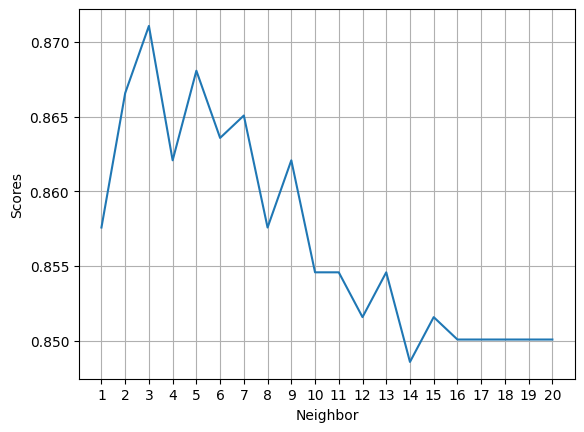

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = churnDf[["account_length", "customer_service_calls"]].values
y = churnDf["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, train_size= 0.80, random_state= 42)

neighbors = [i for i in range(1, 21)]
scoreList = []

for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors = neighbor)
    model.fit(X, y)
    scoreList.append(model.score(X_test, y_test))

print(scoreList.index(max(scoreList)) + 1)
print(max(scoreList))


import matplotlib.pyplot as plt

plt.plot(neighbors, scoreList)
plt.ylabel("Scores")
plt.xlabel("Neighbor")
plt.xticks([i for i in range (1, 21)])
plt.grid()
plt.show()

Remember that there are more than just one classification algorithm :)

END